# Исследование для крупного интернет-магазина по увеличению выручки.

Цель исследования:

Приоритизировать гипотезы по увеличению выручки\
Провести A/B-тест\
Проанализировать результаты A/B-теста и принять решение по результатам теста

План исследования:

Подготовка данных к анализу\
Проведение приоритизации гипотез\
Интерпретация полученных графиков\
Рассчет статистической значимости\
Обработка результатов исследования\
Формулирование выводов по результатам A/B-тестов

## Часть. Приоритизация гипотез.

### Изучаем общую информацию и выполняем предобработку

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
#Импортируем библиотеки

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
#открываем данные для первой части

In [3]:
data.columns = data.columns.str.lower()
#Приводим название столбцов к нижнему регистру

In [4]:
pd.set_option('display.max_colwidth', None)
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


ICE и RICE
Для расчетов используем один из самых популярных способов приоритизации задач ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»), рассчитанный по формуле: (impact * confidence) / efforts.\
И модификацию этого метода - RICE (R от англ. reach, «охват»), рассчитанный по формуле: (impact * confidence * reach) / efforts.

In [5]:
data['ice'] = data['ice'] = (data['impact'] * data['confidence']) / data['efforts']
print(round(data[['hypothesis', 'ice']].sort_values(by='ice', ascending=False), 2))
#Применяем фреймворк ICE для приоритизации гипотез

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Наиболее перспективные гипотезы по 'ICE' - 8, 0, 7, 6

In [6]:
data['rice'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
print(data[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))
#Примените фреймворка RICE для приоритизации гипотез

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы по 'RICE' - 7, 2, 0, 6

При применении RICE вместо ICE приоритизация гипотез изменилась, поскольку фреймворк RICE имеет дополнительный компонент - 'Reach' (скольких пользователей затронет изменение, которое вы хотите внести).\
При применении RICE на первом месте - гипотеза 7, потому что её параметр 'reach' самый большой и равняется 10. В то время, как у другх гипотез этот параметр намного меньше.

## Часть. Анализ A/B-теста

In [7]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
#открываем данные для второй части

In [8]:
print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hypothesis  9 non-null      object 
 1   reach       9 non-null      int64  
 2   impact      9 non-null      int64  
 3   confidence  9 non-null      int64  
 4   efforts     9 non-null      int64  
 5   ice         9 non-null      float64
 6   rice        9 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 632.0+ bytes


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
print('Количество пропущенных значений в данных о гипотезах:', data.duplicated().isna().sum())
print('Количество пропущенных значений в данных о заказах:', orders.duplicated().isna().sum())
print('Количество пропущенных значений в данных о пользователях:', visitors.duplicated().isna().sum())

Количество пропущенных значений в данных о гипотезах: 0
Количество пропущенных значений в данных о заказах: 0
Количество пропущенных значений в данных о пользователях: 0


In [13]:
print('Количество явных дубликатов в данных о гипотезах:', data.duplicated().sum())
print('Количество явных дубликатов в данных о заказах:', orders.duplicated().sum())
print('Количество явных дубликатов в данных о пользователях:', visitors.duplicated().sum())

Количество явных дубликатов в данных о гипотезах: 0
Количество явных дубликатов в данных о заказах: 0
Количество явных дубликатов в данных о пользователях: 0


In [14]:
print(visitors[visitors['group'] == 'A']['group'].value_counts())
print(visitors[visitors['group'] == 'B']['group'].value_counts())

A    31
Name: group, dtype: int64
B    31
Name: group, dtype: int64


In [15]:
visitors.groupby('group')['date'].agg(['min','max']).rename(columns={'min':'first','max':'last'})

,first,last
group,,
A,2019-08-01,2019-08-31
B,2019-08-01,2019-08-31


In [16]:
groups = visitors.loc[visitors['group'] == 'A', 'visitors'].isin(visitors.loc[visitors['group'] == 'B', 'visitors'])
res = visitors.drop(groups[groups].index)
res

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
8,2019-08-09,A,617
9,2019-08-10,A,406
11,2019-08-12,A,595


Вывод о качестве исходных данных:

Названия колонок приведены к читаемому виду.\
Явных дубликатов и пустых значений не выявлено.\
Количество участников теста одинаково в двух группах.\
Дата начала и окончания теста совпадает.\

In [17]:
orders.groupby('group').agg({'visitorId': 'nunique'}).sum()[0]

1089

In [18]:
orders['visitorId'].nunique()

1031

In [19]:
datesGroups = orders[['date', 'group']].drop_duplicates()
#Создаем датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавляемся от дубликатов методом drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])
#Объявляем переменную ordersAggregated, содержащую агрегированные значения таблицы orders

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#Объявляем переменную visitorsAggregated, содержащую агрегированные значения таблицы visitors

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#Определяем переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

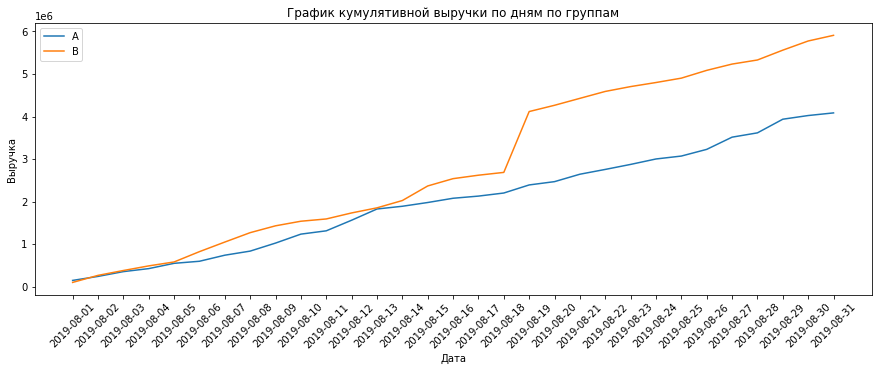

In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
#Объявляем переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраняем данные о датах, выручке и числе заказов в группах A и B.

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивной выручки по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

#Строим графики кумулятивной выручки по дням по группам.

Сегмент B показывал превосходство практически все время теста. В середине теста он показал максимальный рост и продолжил расти.\
Требуется анализ выбросов. Аномалии слишком сильно влияют на результат.

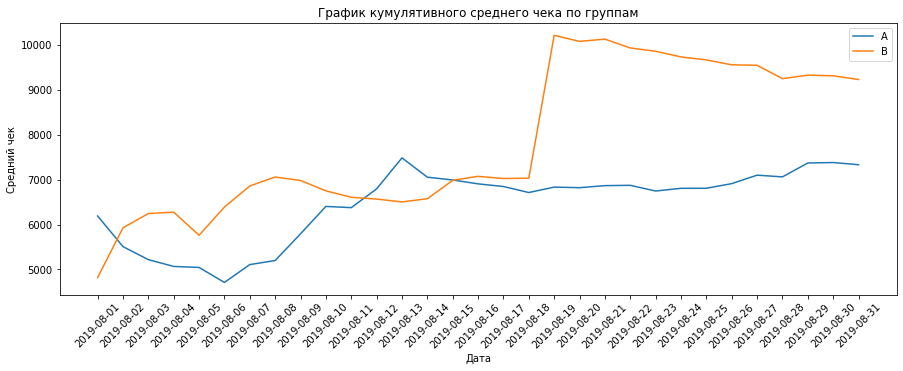

In [21]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
#Строим график кумулятивного среднего чека по группам

Кумулятивное значение среднего чека по группам колеблется до середины теста. После, сегмент В показывает резкий скачок и небольшое снижение, а сегмент А стабилен.\
Требуется анализ выбросов. Аномалии слишком сильно влияют на результат.

Text(0, 0.5, 'Средний чек')

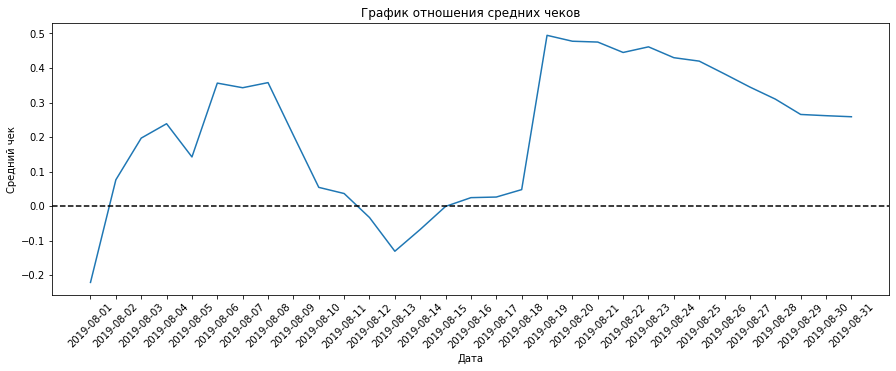

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# собираем данные cumulativeRevenueA и cumulativeRevenueB в одном датафрейме

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation = 45)
plt.title('График отношения средних чеков')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
# cтроим отношение средних чеков

На графике относительного изменения кумулятивного среднего чека группы B к группе A видно, что результаты теста значительно менялись несколько раз. Скорее всего именно в эти даты были оформлены аномальные заказы.

In [23]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


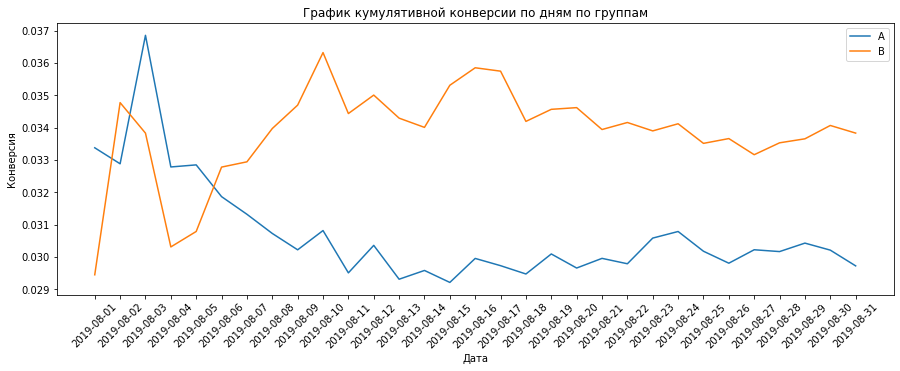

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
#Добавление в датафрейм столбца c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивной конверсии по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
#Строим графики кумулятивной конверсии по дням по группам

В начале теста сегмент А имел большую конверсию, но постепенно начал снижаться. А сегмент В наоборот, начал постепенно расти.

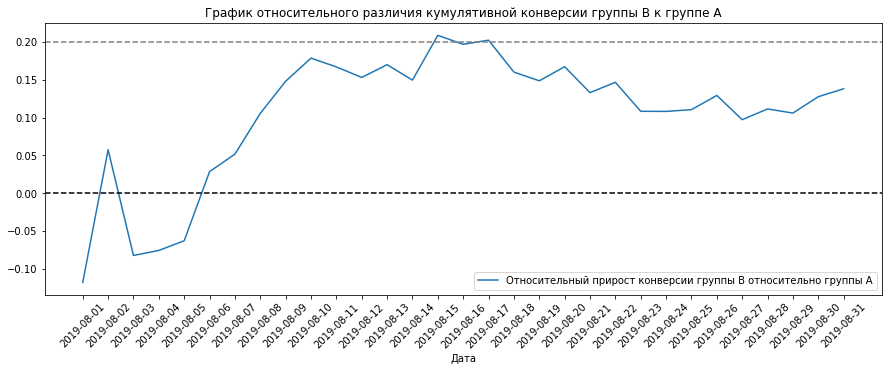

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#Объединение таблиц cumulativeDataA и cumulativeDataB

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation = 45)
plt.title('График относительного различия кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
#Строим график относительного различия кумулятивной конверсии группы B к группе A

Почти с самого начала группа В лидирует по конверсии. В середине теста она фиксируется около прироста 20% и постепенно снижается, находясь стабильно на отметке в 10%

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


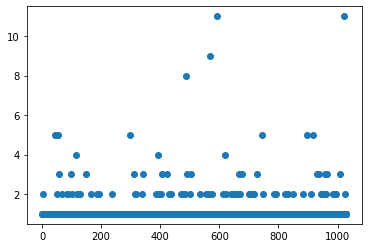

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False) #сгруппирует заказы по пользователям
          .agg({'transactionId': 'nunique'}) #подсчитает число уникальных заказов по сгруппированным данным
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x = x_values, y = ordersByUsers['orders'])

Пользователей с количеством заказов более 2 очень мало, скорее всего это выбросы.

In [27]:
#находит перцентили
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


In [28]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False) #сгруппирует заказы по пользователям
    .agg({'transactionId' : 'nunique',}) #подсчитает число уникальных заказов по сгруппированным данным
    .sort_values(by='transactionId',ascending=False) #отсортирует датафрейм по значению в столбце
)
print(ordersByUsers.head(5))

       visitorId  transactionId
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5


Не более 5% пользователей совершили покупку более 2 раз и не более 1% совершили покупку более 4 раз.\
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

      transactionId   visitorId        date  revenue group
425       590470918  1920142716  2019-08-19  1294500     B
1196     3936777065  2108080724  2019-08-15   202740     B
858       192721366  1316129916  2019-08-27    93940     A
1136      666610489  1307669133  2019-08-13    92550     A
744      3668308183   888512513  2019-08-27    86620     B
682      1216533772  4266935830  2019-08-29    78990     B
662      1811671147  4266935830  2019-08-29    78990     A
743      3603576309  4133034833  2019-08-09    67990     A
1103     1348774318  1164614297  2019-08-12    66350     A
1099      316924019   148427295  2019-08-12    65710     A


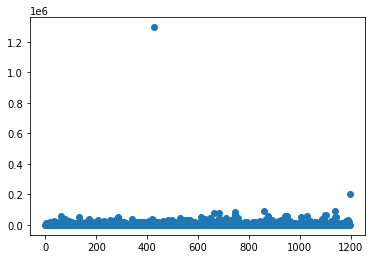

In [29]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x=x_values, y=orders['revenue'])

In [30]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более чем у 5% заказы на сумму 28000 и не более чем у 1% заказы на сумму 58233.2.\
Заказ на сумму 1,3 млн - определенно аномалия.\
По графику можно выбрать границу аномальных заказов между 20 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

Сформулируем гипотезы:\
Нулевая: различий в среднем количестве заказов между группами нет.\
Альтернативная: различия в среднем между группами есть.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.\
Alpha = 0.05

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Прирост среднего группы В к конверсии группы А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Прирост среднего группы В к конверсии группы А: 0.138


p-value меньше 0.05, поэтому отвергаем нулевую гипотезу.\
Анализ сырых данных показывает, что в среднем количестве заказов между группами есть статистически значимые различия.\
Относительный прирост среднего группы В к конверсии группы А - 13,8%.


In [32]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие среднего чека между сегментами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Различие среднего чека между сегментами: 0.259


p-value больше 0.05. Статистически значимые различий в среднем чеке между группами нет.\
Относительное различие среднего чека между сегментами - 25.9%.


In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
#Выявляем аномальных пользователей.
#Примем за аномальных тех, кто совершил более 2 заказов, или совершил заказ на сумму свыше 28 000 рублей.

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64


Найденные 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2 рублям.\
А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.\
Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей.\
Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [34]:
#Считаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


Сегмент В лучше сегмента А, как и в случае с сырыми данными.

In [35]:
#Cчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей

print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Появилась статистическая значимость различия среднего чека между группами.\
После удаления выбросов в данных меньше шума. Различие по выручке 0.2%.

### Выводы по результатам A/B-тестов

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

На основании вышеуказанных фактов необходимо остановить тест и признать его успешным.